# Example 2. Regularization methods
---

### Import class and data
Wine data is used for the exercises.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_wine = pd.read_csv('wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanolds', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanolds,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
print 'Class labels: ', np.unique(df_wine['Class label'])

Class labels:  [1 2 3]


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [6]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
print 'Training accuracy:', lr.score(X_train_std, y_train)

Training accuracy: 0.975609756098


In [10]:
print 'Test accuracy:', lr.score(X_test_std, y_test)

Test accuracy: 0.981481481481


In [11]:
lr.intercept_

array([-0.39572814, -0.07929374, -0.72035119])

In [12]:
lr.coef_

array([[ 0.34986617,  0.        ,  0.        , -0.0974964 ,  0.        ,
         0.        ,  0.46715505,  0.        ,  0.        ,  0.        ,
         0.        ,  0.10697625,  1.268261  ],
       [-0.72613431, -0.10583227, -0.14609142,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.91539947,
         0.        ,  0.        , -0.27544191],
       [ 0.        ,  0.07550992,  0.        ,  0.        ,  0.        ,
         0.        , -0.75508995,  0.        ,  0.        ,  0.57009117,
        -0.35589224, -0.37975534,  0.        ]])

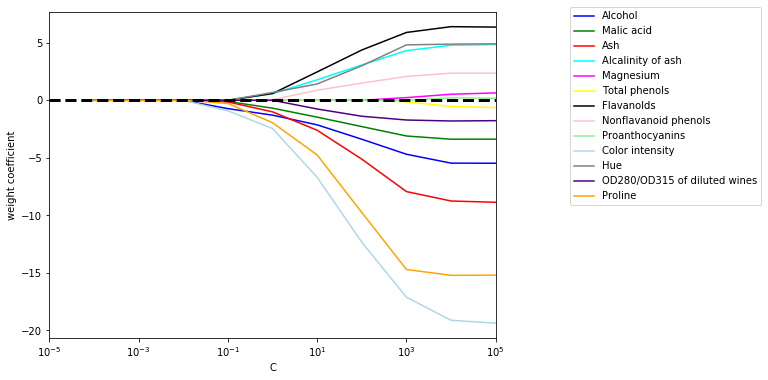

In [13]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot( params, 
              weights[:, column], 
              label=df_wine.columns[column+1],
              color=color )
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, 
          fancybox=True)
plt.show()
             